In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([1, 0, 0, 1])

In [3]:
#Step 1 :- initializing random weights........................................................
def init(layers, inputShape):
    w = []
    w.append (np.random.normal(0,1,(layers[0], inputShape[1]+1)))
    for i in range(1 , len(layers)):
        wi = np.random.normal(0,1,(layers[i], layers[i-1]+1))
        w.append(wi)
    return w

In [4]:
#Sigmoid Activation Function......................................................
def activationFunction(x, w):
    z = np.dot(x, w.T)
    res = 1.0/(1.0 + np.exp(-z))
    return res

In [5]:
#Returns Differentiation Of Sigmoid Function.........................................
def return_sigmoid_der(z):
    return z * (1 - z);

In [6]:
#Backpropogation Algorithm...................................
def Back_Propogation(X, y, lr, epochs):
    errorList = []
    for e in range(epochs):
        totalError = 0
        
        for i in range(X.shape[0]):
            output = []
            x = X[i]
            output.append(x)
            
            #Step 2 : Forward Propogation.................................
            for j in range(len(layers)):
                x = np.insert(x, 0, 1, axis=0)
                x = activationFunction(x, w[j])
                output.append(x)

            y_pred = x
            loss = np.sum((y[i] - y_pred)**2)
            totalError = totalError + loss
            delta = [(y_pred - y[i]) * return_sigmoid_der(output[-1])]

            #Step 3 : Backpropogation.................................
            for k in range(len(output)-2, 0, -1):
                sig = return_sigmoid_der(output[k])
                wi = w[k][:,1:]
                delta.append(np.dot(delta[-1], wi) * sig)

            delta.reverse()

            for k in range(len(w)):
                inp = output[k]
                inp = np.insert(inp, 0, 1, axis=0)
                w[k] = w[k] - lr * np.dot(np.atleast_2d(delta[k]).T,np.atleast_2d(inp))
        errorList.append(totalError)
    return errorList

In [7]:
layers = [4, 3, 2, 1]
w = init(layers, X.shape)

In [8]:
error = Back_Propogation(X, y, 0.1, 100000)

Final Error : 0.0003254255447395452


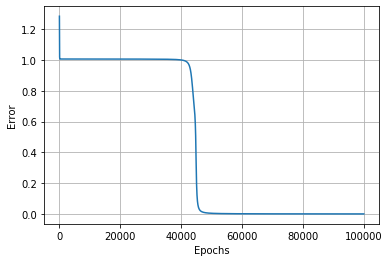

In [9]:
print("Final Error :", error[-1])
plt.plot(error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid()
plt.show()

In [10]:
y_pred = [] 
for i in range(X.shape[0]):
    output = []
    x = X[i]
    output.append(x)
    for j in range(len(layers)):
        x = np.insert(x, 0, 1, axis=0)
        x = activationFunction(x, w[j])
    y_pred.append(x)
y_pred

[array([0.99118903]),
 array([0.0069894]),
 array([0.0084835]),
 array([0.9887327])]